In [14]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('crop_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  79  34  37    20.879744  82.002744  6.502985  202.935536  rice
1  78  21  20    21.770462  80.319644  7.038096  226.655537  rice
2  92  31  34    23.004459  82.320763  7.840207  263.964248  rice
3  98  38  45    26.491096  80.158363  6.980401  242.864034  rice
4  79  53  43    20.130175  81.604873  7.628473  262.717340  rice

In [16]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [17]:
df.shape

(2200, 8)

In [18]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [19]:
df['label'].value_counts()

pomegranate    100
blackgram      100
mothbeans      100
mungbean       100
banana         100
apple          100
rice           100
papaya         100
watermelon     100
mango          100
coconut        100
grapes         100
muskmelon      100
maize          100
coffee         100
kidneybeans    100
orange         100
jute           100
lentil         100
pigeonpeas     100
cotton         100
chickpea       100
Name: label, dtype: int64

In [20]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [21]:
labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map = {labels[i]:i+1 for i in range(len(labels))}
labels_map

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [22]:
dummm = df.copy()
df['label'] = df['label'].map(labels_map)
df.head()

N   P   K  temperature   humidity        ph    rainfall  label
0  79  34  37    20.879744  82.002744  6.502985  202.935536      1
1  78  21  20    21.770462  80.319644  7.038096  226.655537      1
2  92  31  34    23.004459  82.320763  7.840207  263.964248      1
3  98  38  45    26.491096  80.158363  6.980401  242.864034      1
4  79  53  43    20.130175  81.604873  7.628473  262.717340      1

<AxesSubplot:xlabel='label', ylabel='count'>

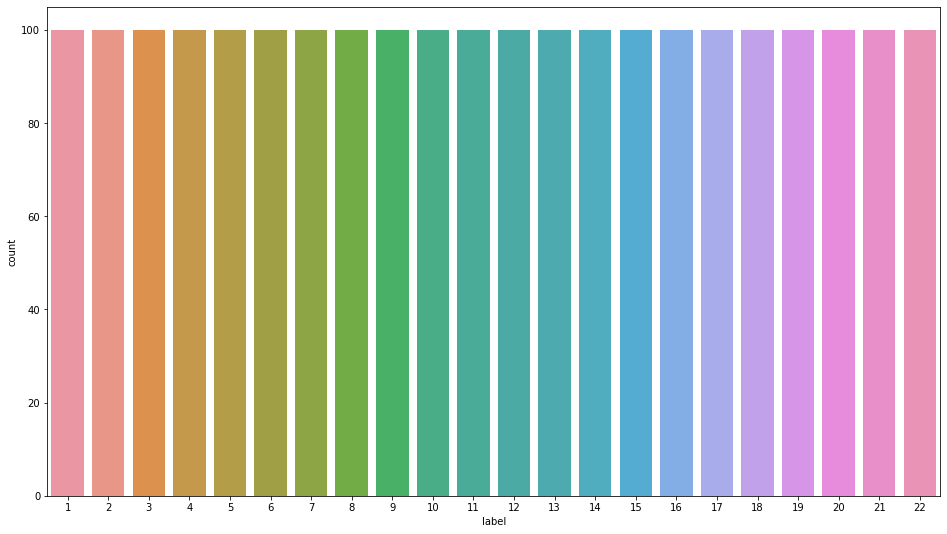

In [23]:
sn.set_palette('Set3')
plt.figure(figsize=(16,9))
sn.countplot(data=df,x = 'label')

In [24]:
import scipy.stats as stats

In [25]:
temp = df.copy()

In [27]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [28]:
temp = temp.dropna()
temp.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [29]:
temp.shape

(2200, 8)

In [30]:
temp.head()

N   P   K  temperature   humidity        ph    rainfall  label
0  79  34  37    20.879744  82.002744  6.502985  202.935536      1
1  78  21  20    21.770462  80.319644  7.038096  226.655537      1
2  92  31  34    23.004459  82.320763  7.840207  263.964248      1
3  98  38  45    26.491096  80.158363  6.980401  242.864034      1
4  79  53  43    20.130175  81.604873  7.628473  262.717340      1

In [31]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [32]:
temp.head(2)

N   P   K  temperature   humidity        ph    rainfall  label
0  79  34  37    20.879744  82.002744  6.502985  202.935536      1
1  78  21  20    21.770462  80.319644  7.038096  226.655537      1

In [33]:
test = temp['label']
train = temp.drop(['label'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)

In [34]:
sc = StandardScaler()
train_scaled = sc.fit_transform(X_train)
test_scaled = sc.transform(X_test)

In [35]:
scaled_df = pd.DataFrame(train_scaled,columns=train.columns)

In [36]:
scaled_df.head()

N         P         K  temperature  humidity        ph  rainfall
0  1.031618 -1.348192  0.412403    -0.131481  0.615926  0.342971 -0.876513
1  0.768656  0.438745 -0.048136     0.369494  0.539493 -0.962803 -0.198085
2 -0.782820  0.995332 -0.623811     0.080631 -0.101576  0.781822 -0.953827
3 -1.072078  0.790273 -0.873269    -0.882084 -0.682475 -1.083619  1.464087
4 -1.282448  0.028628 -0.431919     0.155106 -0.431531 -0.225846 -1.230545

In [37]:
mm = MinMaxScaler()
train_mm = mm.fit_transform(X_train)
test_mm = mm.transform(X_test)

In [38]:
scaled_mm = pd.DataFrame(train_mm,columns=train.columns)

In [39]:
scaled_mm.head()

N         P         K  temperature  humidity        ph  rainfall
0  0.642857  0.064516  0.347826     0.449988  0.825851  0.502379  0.126116
1  0.571429  0.458065  0.243478     0.524064  0.805537  0.343769  0.260865
2  0.150000  0.580645  0.113043     0.481352  0.635148  0.555685  0.110760
3  0.071429  0.535484  0.056522     0.339002  0.480751  0.329094  0.591003
4  0.014286  0.367742  0.156522     0.492364  0.547449  0.433286  0.055799

In [40]:
dum = scaled_df.copy()


In [41]:
dum = scaled_df.copy()


In [42]:
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.fit_transform(X_test)

In [43]:
#ML ALGO 

from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn import tree

In [44]:
X_train_df = pd.DataFrame(X_train_scaled,columns=train.columns)
X_train_df.head()

N         P         K  temperature  humidity        ph  rainfall
0  0.642857  0.064516  0.347826     0.449988  0.825851  0.502379  0.126116
1  0.571429  0.458065  0.243478     0.524064  0.805537  0.343769  0.260865
2  0.150000  0.580645  0.113043     0.481352  0.635148  0.555685  0.110760
3  0.071429  0.535484  0.056522     0.339002  0.480751  0.329094  0.591003
4  0.014286  0.367742  0.156522     0.492364  0.547449  0.433286  0.055799

In [45]:
X_train_scaled

array([[0.64285714, 0.06451613, 0.34782609, ..., 0.82585135, 0.5023788 ,
        0.1261163 ],
       [0.57142857, 0.45806452, 0.24347826, ..., 0.80553651, 0.34376941,
        0.26086458],
       [0.15      , 0.58064516, 0.11304348, ..., 0.63514762, 0.55568497,
        0.11076026],
       ...,
       [0.37857143, 0.52903226, 0.2173913 , ..., 0.624348  , 0.61381534,
        0.15516908],
       [0.12857143, 0.25806452, 0.12173913, ..., 0.46820257, 0.43014541,
        0.24831973],
       [0.27857143, 0.22580645, 0.16521739, ..., 0.8756947 , 0.43850692,
        0.30441109]])

In [46]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.030,0.035,0.040,0.045,0.050],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [47]:
scores = []
for model_name,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],param_distributions= mp['params'],cv = 5,n_jobs=-1,n_iter = 10,scoring='accuracy',
                            verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
c:\Users\TUSHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\TUSHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also r

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


In [48]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_estimator','best_score'])
scores_df

model_name                                     best_estimator  best_score
0  RandomForest  (DecisionTreeClassifier(ccp_alpha=0.03, max_de...    0.959659
1      logistic  LogisticRegression(max_iter=84, multi_class='o...    0.926705
2        D-tree  DecisionTreeClassifier(ccp_alpha=0.045, criter...    0.692614
3           SVM  SVC(C=0.75, kernel='poly', max_iter=167, tol=0...    0.951136

In [49]:
for i in scores_df['best_estimator']:
    print(i)

RandomForestClassifier(ccp_alpha=0.03, max_depth=15, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=12,
                       n_estimators=1066)
LogisticRegression(max_iter=84, multi_class='ovr', tol=0.001)
DecisionTreeClassifier(ccp_alpha=0.045, criterion='entropy',
                       max_features='auto', min_samples_leaf=12)
SVC(C=0.75, kernel='poly', max_iter=167, tol=0.75)


In [85]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')

svc = SVC(C=0.75, kernel='poly', max_iter=167, tol=0.75)

Dtree = DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=5)

rf_val = cross_val_score(estimator=rf,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
lr_val = cross_val_score(estimator = lr,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
svc_val = cross_val_score(estimator=svc,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)
Dtree_val = cross_val_score(estimator=Dtree,X=X_train_scaled,y=y_train,cv=20,n_jobs=-1)

In [86]:
score_list = [rf_val,lr_val,svc_val,Dtree_val]
model_name = ['rf','lr','svc','Dtree']
for i,j in zip(score_list,model_name):
    print(f' Model : {j} gave {i.mean()} accuracy')

 Model : rf gave 0.9624999999999998 accuracy
 Model : lr gave 0.9130681818181818 accuracy
 Model : svc gave 0.9772727272727272 accuracy
 Model : Dtree gave 0.7517045454545455 accuracy


In [87]:
from sklearn import metrics

In [88]:
svc = SVC(C=0.75, kernel='poly', max_iter=167, tol=0.75)
svc.fit(X_train_scaled,y_train)
svc.score(X_train_scaled,y_train)

0.9880681818181818

In [89]:
rf = RandomForestClassifier(ccp_alpha=0.03, max_depth=22, min_samples_leaf=12,
                       min_samples_split=5, n_estimators=800)

rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9625

In [90]:
svc = SVC(C=0.75, kernel='poly', max_iter=167, tol=0.75)
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

0.9630681818181818

In [91]:
Dtree = DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=5)
Dtree.fit(X_train,y_train)
Dtree.score(X_train,y_train)

0.8147727272727273

In [92]:
lr = LogisticRegression(C=0.75, max_iter=194, multi_class='ovr', penalty='l1',
                   solver='liblinear')
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.9215909090909091

In [93]:
svc.score(X_test,y_test)

0.9431818181818182

In [94]:
rf.score(X_test,y_test)

0.9409090909090909

In [95]:
lr.score(X_test,y_test)

0.9068181818181819

In [96]:
Dtree.score(X_test,y_test)

0.7909090909090909

<AxesSubplot:>

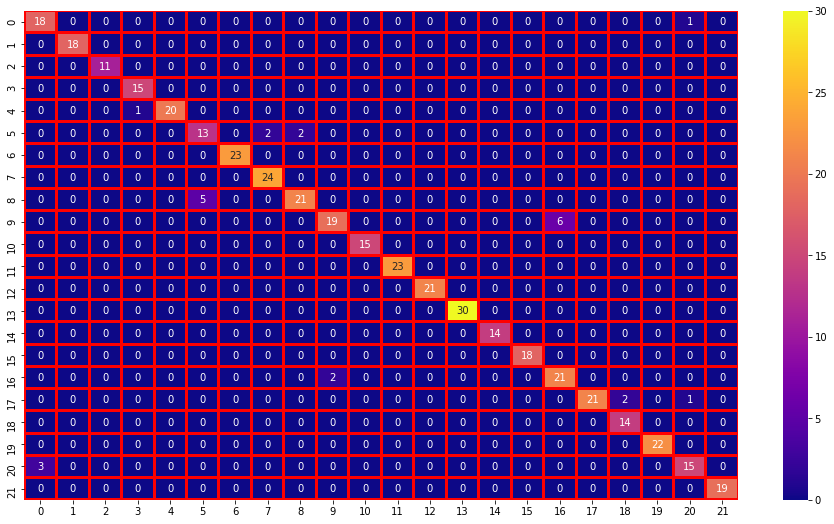

In [97]:
y_pred = svc.predict(X_test)
cn = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(16,9))
sn.heatmap(cn,annot=True,linecolor='red',linewidths=2,cmap='plasma')

In [99]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        19
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        11
           4       0.94      1.00      0.97        15
           5       1.00      0.95      0.98        21
           6       0.72      0.76      0.74        17
           7       1.00      1.00      1.00        23
           8       0.92      1.00      0.96        24
           9       0.91      0.81      0.86        26
          10       0.90      0.76      0.83        25
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00        18
          17       0.78      0.91      0.84        23
          18       1.00    

In [100]:
train.shape,temp.shape

((2200, 7), (2200, 11))

In [101]:
train = np.array(train)
predict_list = []
for i in range(0,len(train)):
    predict_list.append(svc.predict([train[i]]))

In [102]:
predict_list = np.array(predict_list)

In [103]:
temp.head()

N   P   K  temperature   humidity        ph    rainfall  label  \
0  79  34  37    20.879744  82.002744  6.502985  202.935536      1   
1  78  21  20    21.770462  80.319644  7.038096  226.655537      1   
2  92  31  34    23.004459  82.320763  7.840207  263.964248      1   
3  98  38  45    26.491096  80.158363  6.980401  242.864034      1   
4  79  53  43    20.130175  81.604873  7.628473  262.717340      1   

  Original_labels  SVM_pred Predicted_labels  
0            rice         1             rice  
1            rice         1             rice  
2            rice         1             rice  
3            rice         1             rice  
4            rice         1             rice

In [104]:
original_labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
labels_map_new = {i+1:original_labels[i] for i in range(len(original_labels))}
labels_map_new

{1: 'rice',
 2: 'maize',
 3: 'chickpea',
 4: 'kidneybeans',
 5: 'pigeonpeas',
 6: 'mothbeans',
 7: 'mungbean',
 8: 'blackgram',
 9: 'lentil',
 10: 'pomegranate',
 11: 'banana',
 12: 'mango',
 13: 'grapes',
 14: 'watermelon',
 15: 'muskmelon',
 16: 'apple',
 17: 'orange',
 18: 'papaya',
 19: 'coconut',
 20: 'cotton',
 21: 'jute',
 22: 'coffee'}

In [116]:
# 21st label is jute!

data = np.array([[98,36,44,23.97898217,81.45061596,7.50283396,250.0832336]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])

data = np.array([[89,42,13,25.70196694,61.33450447,6.960358276,83.20711308]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])


data = np.array([[24,28,13,27.65280218,89.80650642,6.459252023,56.52558045]])
prediction = svc.predict(data)
pred = prediction[0]
print(labels_map_new[pred])

rice
maize
mungbean


In [120]:
import pickle

file = open('cropmodel2.pkl','wb')
pickle.dump(svc,file)
file.close()

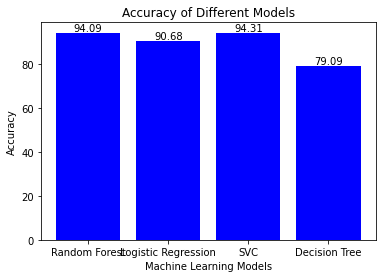

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# List of machine learning model names
models = ['Random Forest', 'Logistic Regression', 'SVC', 'Decision Tree']

# Corresponding accuracy values for each model
accuracies = [94.09,90.68,94.31,79.09]

# Plotting the vertical bars
plt.bar(models, accuracies, color='blue')

# Adding accuracy values on top of the bars
for i, value in enumerate(accuracies):
    plt.text(i, value , f'{value:.2f}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Display the plot
plt.show()
